# Homework 5 - Logistic Regression

## Your Name Here

Student Name: Dylan Lam

Student UT EID: DXL85

---

Partner Name:

Partner UT EID:

---

Date Created: 2/20/24

Date Last Modified: 2/24/24

---

Totoal Points 20. 

In [681]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [682]:
# Your code here
heart_df = pd.read_csv("/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 (5 points)
We want to use logistic regerssion to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data. 

In [683]:
# Encoding Target Variabe
heart_df.loc[heart_df['Target'] == 'No', 'Target'] = 0
heart_df.loc[heart_df['Target'] == 'Yes', 'Target'] = 1
heart_df['Target'] = heart_df['Target'].astype(int)

In [684]:
X = heart_df[['Age', 'Sex', 'Chol']]
y = heart_df['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Task 2 - (10 points)

Generate a logistic regression model using your training data. 

Print out the accuracy if your model. 

In [685]:
# Add your code Here! 
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5737704918032787


# Task 3 - (5 points)


Generate the classification report for your Logistic regresion model and interpret your results regarding precision, recall and f1-score. 


In [686]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.55      0.62      0.58        29
           1       0.61      0.53      0.57        32

    accuracy                           0.57        61
   macro avg       0.58      0.58      0.57        61
weighted avg       0.58      0.57      0.57        61



**Precision:**

- For the "No" class, the precision is 0.55, meaning that among all the instances predicted as "No", 55% were actually "No".
- For the "Yes" class, the precision is 0.61, indicating that among all the instances predicted as "Yes", 61% were actually "Yes".

**Recall:**

- For the "No" class, the recall is 0.62, indicating that the model correctly identified 62% of all the actual "No" instances.
- For the "Yes" class, the recall is 0.53, indicating that the model correctly identified 53% of all the actual "Yes" instances.

**F1-score:**

- For the "No" class, the F1-score is 0.58, which is the harmonic mean of precision and recall for the "No" class.
- For the "Yes" class, the F1-score is 0.57, which is the harmonic mean of precision and recall for the "Yes" class.

**Support:**

- The support indicates the number of actual occurrences of each class in the test dataset. For example, there were 29 instances of "No" and 32 instances of "Yes" in the test dataset.

**Accuracy:**

- The overall accuracy of the model is 0.57, which means that the model correctly predicted the class labels for 57% of the instances in the test dataset.

**Macro Avg:**

- The macro average precision, recall, and F1-score are calculated by averaging the precision, recall, and F1-score across all classes, without considering the class imbalance. Here, the macro average F1-score is 0.57.

**Weighted Avg:**

- The weighted average precision, recall, and F1-score are calculated by averaging the precision, recall, and F1-score across all classes, with each class's score weighted by its support. Here, the weighted average F1-score is 0.57.

# Task 4 - Optional Task (2 extra points)


Which other feature of your data can you use to improve your prediction? Build other models and improve your prediction. 


**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

In [687]:
heart_df.dtypes != ('float64' or 'int64')

Age           True
Sex           True
ChestPain     True
RestBP        True
Chol          True
Fbs           True
RestECG       True
MaxHR         True
ExAng         True
Oldpeak      False
Slope         True
Ca           False
Thal          True
Target        True
dtype: bool

In [688]:
# Structuring/Formatting Data for Modeling

# ChestPain
heart_df.loc[heart_df['ChestPain'] == 'asymptomatic', 'ChestPain'] = 0
heart_df.loc[heart_df['ChestPain'] == 'nontypical', 'ChestPain'] = 1
heart_df.loc[heart_df['ChestPain'] == 'nonanginal', 'ChestPain'] = 2
heart_df.loc[heart_df['ChestPain'] == 'typical', 'ChestPain'] = 3
heart_df['ChestPain'] = heart_df['ChestPain'].astype(int)

# Oldpeak
heart_df['Oldpeak'] = heart_df['Oldpeak'].astype(float)

# Thal
heart_df.loc[heart_df['Thal'] == 'fixed', 'Thal'] = 0
heart_df.loc[heart_df['Thal'] == 'normal', 'Thal'] = 1
heart_df.loc[heart_df['Thal'] == 'reversable', 'Thal'] = 2
heart_df['Thal'] = heart_df['Thal'].astype(float)
heart_df.dtypes

Age            int64
Sex            int64
ChestPain      int64
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal         float64
Target         int64
dtype: object

Length of X_imputed: 242
Length of y_train: 242
<bound method DataFrame.sort_values of       Feature  Importance
4        Chol    0.166861
0         Age    0.147911
7       MaxHR    0.141933
3      RestBP    0.137852
9     Oldpeak    0.114581
2   ChestPain    0.052926
11         Ca    0.049880
8       ExAng    0.039066
12       Thal    0.038025
6     RestECG    0.034974
10      Slope    0.031553
1         Sex    0.026528
5         Fbs    0.017911>


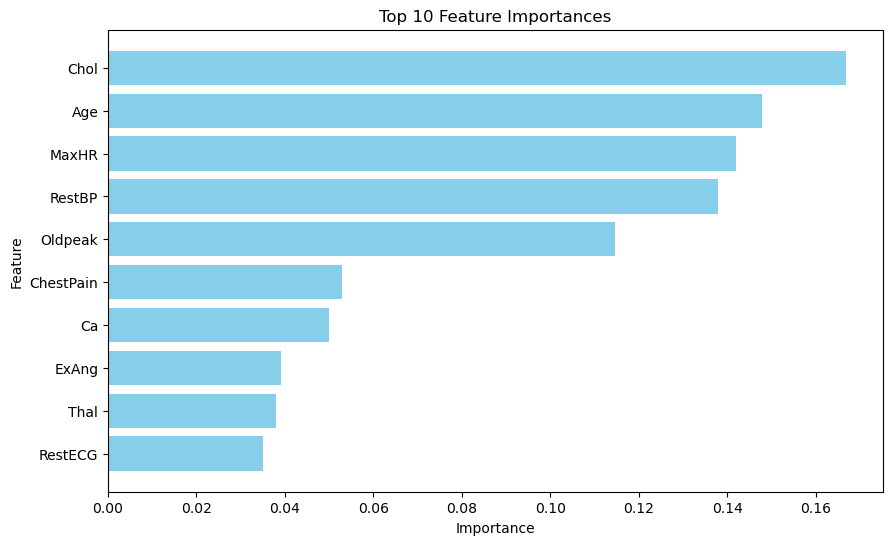

In [689]:
# Calculating most influential features for prediction

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


# Create and fit the RandomForestClassifier
clf = RandomForestClassifier()

# Impute missing values in the features DataFrame
imputer = SimpleImputer()
X_imputed = imputer.fit_transform(heart_df.drop('Target', axis=1))

# Now, ensure the target labels match the number of samples in the features DataFrame
X_imputed = X_imputed[:len(y_train)]

# Check the lengths of X_imputed and y_train_matched
print("Length of X_imputed:", len(X_imputed))
print("Length of y_train:", len(y_train))

clf.fit(X_imputed, y_train)


# Get feature importances
importances_1d = clf.feature_importances_.ravel()

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': heart_df.drop('Target', axis=1).columns,
    'Importance': importances_1d
})


# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top feature importances
print(feature_importance_df.sort_values)

# Sort the feature importances in descending order
sorted_idx = np.argsort(importances_1d)[::-1]

# Get the top features and their importances
top_features = feature_importance_df['Feature'][sorted_idx][:10]
top_importances = importances_1d[sorted_idx][:10]

# Plot the top features and their importances
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()



In [690]:
# Including top 5 influential features

X2 = heart_df[['Age', 'RestBP', 'Chol', 'ChestPain', 'MaxHR']]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = .2, random_state = 42)
model3 = LogisticRegression()
model3.fit(X2_train, y_train)
y_pred = model3.predict(X2_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7540983606557377
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.79      0.72      0.75        32

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



In [691]:
# Using all features except 'Target'

# Drop rows with missing values from both features and target
heart_df_clean = heart_df.dropna()
X3 = heart_df_clean.drop('Target', axis=1)
y_clean = heart_df_clean['Target']

# Split the cleaned data into training and testing sets
X3_train, X3_test, y_train, y_test = train_test_split(X3, y_clean, test_size=0.2, random_state=42)

# Train the model and make predictions
model5 = LogisticRegression()
model5.fit(X3_train, y_train)
y_pred = model5.predict(X3_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        36
           1       0.86      0.75      0.80        24

    accuracy                           0.85        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.85      0.85      0.85        60



/Users/dylanlam/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using all features except for 'Target' as input features significantly increases the predictive model.